In [7]:
import numpy as np
import pandas as pd
from sklearn import metrics 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from lifelines import KaplanMeierFitter, CoxPHFitter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
data_path = "/Users/carolgao/Documents/GitHub/6.7960-fa24-project/"

In [5]:
df = pd.read_csv(f"{data_path}/liver_training2.csv")

In [6]:
df

,Epoch,Train Loss,Val Loss,Val Improvement
0,0,0.11947,0.11710,-1.2631
1,1,0.11937,0.11702,-1.2631
2,2,0.11928,0.11693,-1.2631
3,3,0.11920,0.11683,-1.2631
4,4,0.11911,0.11674,-1.2631
...,...,...,...,...
1007,1007,0.02263,0.05557,0.5068
1008,1008,0.02260,0.05561,0.5068
1009,1009,0.02257,0.05565,0.5068
1010,1010,0.02254,0.05570,0.5068


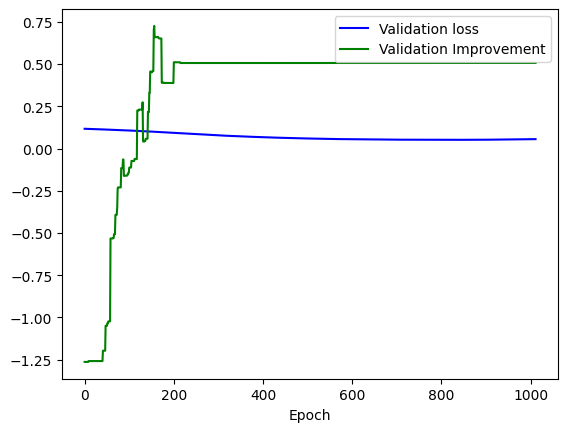

In [14]:
plt.plot(df['Epoch'], df['Val Loss'], label="Validation loss", color="blue", linestyle="-")
plt.plot(df['Epoch'], df['Val Improvement'], label="Validation Improvement", color="green", linestyle="-")
plt.xlabel("Epoch")
plt.legend()

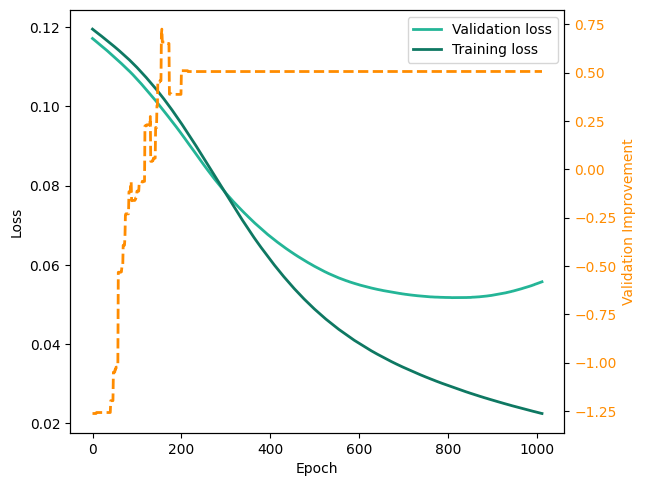

In [91]:
# Create the first plot (left y-axis)
fig, ax1 = plt.subplots()
ax1.plot(df['Epoch'], df['Val Loss'], color='#24b597', label="Validation loss", linewidth=2)
ax1.plot(df['Epoch'], df['Train Loss'], color='#0e7862', label="Training loss", linewidth=2)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss", color='black')
ax1.tick_params(axis="y", labelcolor='black')
plt.legend()

# Create the second plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(df['Epoch'], df['Val Improvement'], color='darkorange', label="Validation Improvement", linestyle="--", linewidth=2)
ax2.set_ylabel("Validation Improvement", color='darkorange')
ax2.tick_params(axis="y", labelcolor='darkorange')
plt.tight_layout(pad=0.5)  
plt.savefig(f"{data_path}/images/training_curve.png")